In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%cd ./data/
%ldir
df = pd.read_csv('opsd.csv',sep=';') #raw dataset
df.head()

/home/jupyter/profiles/tko/bachelor thesis/proloaf/data
drwxr-xr-x 4 jupyter        7 Jul  8 15:59 plf-data/


,Time,DE_load_actual_entsoe_transparency,DE_temperature,DE_radiation_direct_horizontal,DE_radiation_diffuse_horizontal,hour_sin,hour_cos,weekday_sin,weekday_cos,mnth_sin,...,month_10,month_11,month_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,2015-01-01 00:00:00,41151.0,-0.981,0.0,0.0,0.000000,1.000000,0.433884,-0.900969,0.0,...,0,0,0,0,0,0,1,0,0,0
1,2015-01-01 01:00:00,40135.0,-1.035,0.0,0.0,0.258819,0.965926,0.433884,-0.900969,0.0,...,0,0,0,0,0,0,1,0,0,0
2,2015-01-01 02:00:00,39106.0,-1.109,0.0,0.0,0.500000,0.866025,0.433884,-0.900969,0.0,...,0,0,0,0,0,0,1,0,0,0
3,2015-01-01 03:00:00,38765.0,-1.166,0.0,0.0,0.707107,0.707107,0.433884,-0.900969,0.0,...,0,0,0,0,0,0,1,0,0,0
4,2015-01-01 04:00:00,38941.0,-1.226,0.0,0.0,0.866025,0.500000,0.433884,-0.900969,0.0,...,0,0,0,0,0,0,1,0,0,0


<AxesSubplot:ylabel='Density'>

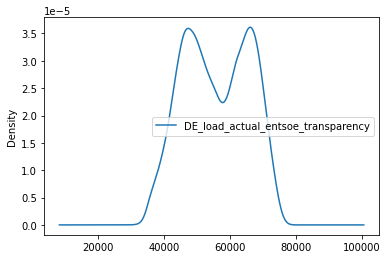

In [2]:
load = df.iloc[:,[0,1]]
temp = df.iloc[:,[0,2]]
load.plot(x='Time', y='DE_load_actual_entsoe_transparency', kind='kde')


In [3]:
load_avg = load.mean()
print(load_avg)
temp_avg = temp.mean()
print(temp_avg)

DE_load_actual_entsoe_transparency    55859.295044
dtype: float64
DE_temperature    9.850719
dtype: float64


<AxesSubplot:ylabel='Density'>

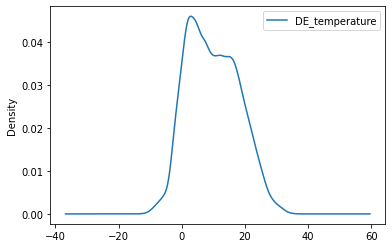

In [4]:
temp.plot(x='Time', y='DE_temperature', kind='kde')

## find special days

days with highest load: 
- 13.12.2017 -> timestep 25848 - history horizon
- 28.11.2018 -> timestep = 34248 - history horizon
- 14.12.2017 -> 25872 - hh
- 07.12.2017 -> 25704 - hh

days with lowest load:
- 18.09.2016 -> 15024 -hh
- 25.05.2015 -> 3456 - hh
- 17.09.2016
- 24.05.2015


days with highest temperature:
- 25.07.2019 -> 39984 - hh
- 24.07.2019 -> 39960 - hh
- 04.07.2015 -> 4416 - hh
- 26.07.2019 -> 40008 - hh

days with lowest temperature:
- 28.02.2018 -> 27696 - hh 
- 01.03.2018 -> 27720 - hh
- 27.02.2018
- 02.03.2018

days with highest radiation (direct horizontal):
- 02.07.2018 11:00 -> 30672 - hh
- 29.06.2019 11:00 -> 39360 - hh
- 01.07.2018 11:00 -> 30648 - hh
- 02.07.2018 10:00 -> 30672 - hh

days with highest radiation (diffuse horizontal):
- 23.05.2016 11:00 -> 12192 - hh
- 13.06.2016 11:00 -> 12696 - hh
- 10.06.2019 11:00 -> 38904 - hh
- 29.05.2016 11:00 -> 12336 - hh

# find similar days

# mondays

- 02.02.2015
- 09.02.2015
- 16.02.2015
- 23.02.2015



In [5]:
mondays = df.loc[lambda df: df['weekday_0']==1]
mondays.head()
#for day in mondays_roll:
     #print(day)
    #day.plot( x='Time', y='DE_load_actual_entsoe_transparency')


,Time,DE_load_actual_entsoe_transparency,DE_temperature,DE_radiation_direct_horizontal,DE_radiation_diffuse_horizontal,hour_sin,hour_cos,weekday_sin,weekday_cos,mnth_sin,...,month_10,month_11,month_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
96,2015-01-05 00:00:00,40699.0,-0.795,0.0,0.0,0.000000,1.000000,0.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,0
97,2015-01-05 01:00:00,39447.0,-0.937,0.0,0.0,0.258819,0.965926,0.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,0
98,2015-01-05 02:00:00,39513.0,-1.117,0.0,0.0,0.500000,0.866025,0.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,0
99,2015-01-05 03:00:00,40440.0,-1.338,0.0,0.0,0.707107,0.707107,0.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,0
100,2015-01-05 04:00:00,43931.0,-1.586,0.0,0.0,0.866025,0.500000,0.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,0


338256


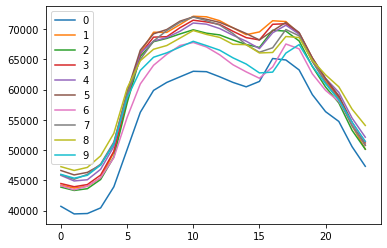

In [21]:

print(mondays.size)
x = np.arange(0,24)
for i in range(10):
    day = mondays.iloc[i*24:i*24+24,1]
    plt.plot(x,day, label=str(i))
    
plt.legend()   
plt.show()

    
    
    

1,2,3,4 look similar

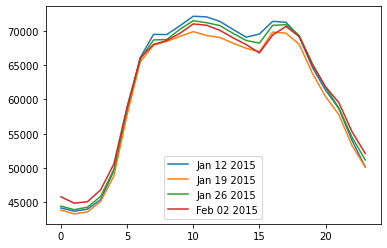

In [29]:
x = np.arange(0,24)
for i in range(1,5):
    day = mondays.iloc[i*24:i*24+24,1]
    date = pd.to_datetime(mondays.iloc[i*24,0])
    plt.plot(x,day, label=date.strftime('%b %d %Y'))
    
plt.legend()   
plt.show()

 - 12.01.2015 -> 264 - hh
 - 19.01.2015 -> 432 - hh
 - 26.01.2015 -> 600 - hh 
 - 02.02.2015 -> 768 - hh